In [1]:
from IPython.display import SVG
import numpy as np
from sknetwork.ranking import PageRank
from sknetwork.visualization import svg_graph, svg_bigraph
from sknetwork.data import from_edge_list, from_adjacency_list, block_model
import matplotlib.pyplot as plt
from scipy import sparse
import random
from collections import Counter
from scipy.stats import entropy
import seaborn as sns
from tqdm import tqdm
from scipy.sparse import csr_matrix


In [2]:
graph = block_model([127,1], p_in=[0.1,0.001], p_out=0.98, metadata=True)
adjacency = graph.adjacency
labels = graph.labels

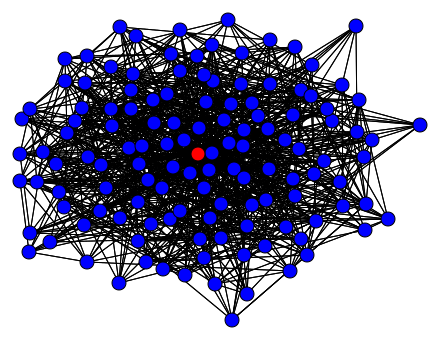

In [3]:
image = svg_graph(graph.adjacency, labels=graph.labels)
SVG(image)

Entropy:  4.770274683478072


Text(0, 0.5, 'Pagerank scores')

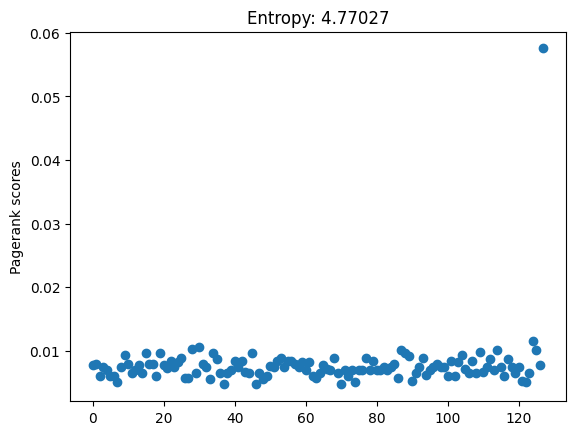

In [4]:
pagerank = PageRank()
scores = pagerank.fit_predict(graph.adjacency)
print("Entropy: ", entropy(scores))
entropy_value = entropy(scores)

plt.scatter(range(len(scores)),scores)
plt.title("Entropy: {:.5f}".format(entropy_value))  # Affichage de l'entropie dans le titre
plt.ylabel("Pagerank scores")

In [5]:
def proba_sample(sample):
    counts = Counter(sample)
    Count_Keys = list(counts.keys())
    Count_Keys.sort()
    sorted_counts = {i: counts[i] for i in Count_Keys}

    prob_vec = []
    for i in range(len(scores)):
        if i in list(sorted_counts.keys()):
            prob_vec.append(sorted_counts[i])
        else:
            prob_vec.append(0)

    prob_vec = np.array(prob_vec)/sum(prob_vec)
    return prob_vec

<BarContainer object of 128 artists>

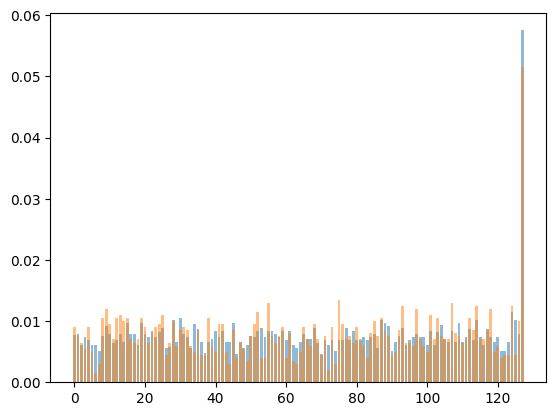

In [6]:
points = list(range(len(scores)))
nbr_of_sample = 2000
# scores_1 = [0]*len(scores)
# scores_1[0:2] = scores[0:2]
# print(scores)
# print(scores_1)
sample = random.choices(points, scores, k = nbr_of_sample)
plt.bar(range(len(scores)),scores, alpha = 0.5)
plt.bar(range(len(scores)),proba_sample(sample), alpha = 0.5)


1) Sample T points from D (domain of D is [n])
2) For each point sigma in T
    a) For each index j in [log(n)]
            sample K times from D_sigma<j

small test

In [7]:
points = list(range(16))
n = len(points)
nbr_K = 50
# print(points)


sigma = 5

sup = points[n-1]
inf = 0
middle = int(inf + (sup-inf+1)/2)

# print("inf: ",inf)
# print("sup: ", sup)
# print("middle: ", middle)
# print("----------------------")
while middle > inf:
    if sigma >= middle:
        inf = middle
    else: 
        sup = middle - 1 
    middle = int(inf + (sup-inf+1)/2)   

    # print("inf: ",inf)
    # print("sup: ", sup)
    # print("middle: ", middle)
    # print("----------------------")

    # scores_1 = [0]*n
    # scores_1[inf, sup] = scores[inf, sup]
    # K.append(random.choices(points, scores_1, k = nbr_K))
    print("sample ", nbr_K, "numbers between ",inf, " and ", sup)


sample  50 numbers between  0  and  7
sample  50 numbers between  4  and  7
sample  50 numbers between  4  and  5
sample  50 numbers between  5  and  5


draw sample based on distribution "scores" given by Page Rank

point sigma:  127
draw numbers between  64  and  127
draw numbers between  96  and  127
draw numbers between  112  and  127
draw numbers between  120  and  127
draw numbers between  124  and  127
draw numbers between  126  and  127
draw numbers between  127  and  127
point sigma:  85
draw numbers between  64  and  127
draw numbers between  64  and  95
draw numbers between  80  and  95
draw numbers between  80  and  87
draw numbers between  84  and  87
draw numbers between  84  and  85
draw numbers between  85  and  85
point sigma:  66
draw numbers between  64  and  127
draw numbers between  64  and  95
draw numbers between  64  and  79
draw numbers between  64  and  71
draw numbers between  64  and  67
draw numbers between  66  and  67
draw numbers between  66  and  66
point sigma:  1
draw numbers between  0  and  63
draw numbers between  0  and  31
draw numbers between  0  and  15
draw numbers between  0  and  7
draw numbers between  0  and  3
draw numbers between  0  and  1
draw numb

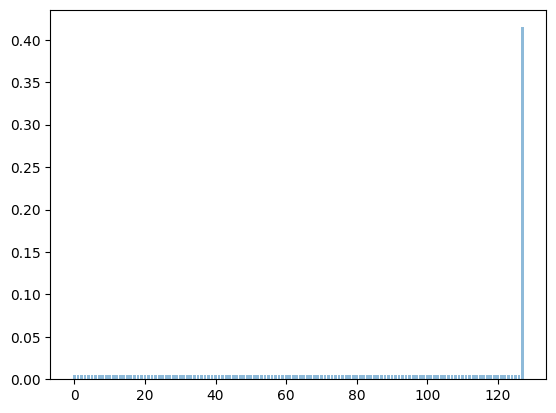

In [9]:

# Create a distribution
scores = [0.01]*128
scores[127] = 0.9
scores = [value / sum(scores) for value in scores]
plt.bar(range(len(scores)),scores, alpha = 0.5)



n = len(scores) # size of domain D, scores is the distribution
points = list(range(n)) # The domain D
nbr_T = 10
nbr_K = 3
scores_no_zeros = [value + 0.0001 for value in scores] # avoid division by zero

K = []
T = random.choices(points, scores, k = nbr_T)
for sigma in T:

    print("point sigma: ", sigma)

    sup = points[n-1]
    inf = 0
    middle = int(inf + (sup-inf+1)/2)

    while middle > inf:
        if sigma >= middle:
            inf = middle
        else: 
            sup = middle - 1 
        middle = int(inf + (sup-inf+1)/2)   

        scores_1 = [0]*n
        scores_1[inf: sup+1] = scores_no_zeros[inf: sup+1]
        scores_1 = [value / sum(scores_1) for value in scores_1]

        K.append(random.choices(points, scores_1, k = nbr_K))
        print("draw numbers between ",inf, " and ", sup)

print(K)


test 03/10